In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Function Calling Agent

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/function-calling.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fsample-apps%2Fgenai-experience-concierge%2Fagent-design-patterns%2Ffunction-calling.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/function-calling.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/function-calling.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/function-calling.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/function-calling.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/function-calling.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/function-calling.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/function-calling.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| | | |
|-|-|-|
|Author(s) | [Pablo Gaeta](https://github.com/pablofgaeta) | [Aadila Jasmin](https://github.com/aadi1405) |

## Overview

### Introduction

Large Language Models (LLMs) are powerful at solving many types of problems. However, they are constrained by the following limitations:

- They are frozen after training, leading to stale knowledge.
- They can't query or modify external data.

Function calling can address these shortcomings. Function calling is sometimes referred to as tool use because it allows the model to use external tools such as APIs and functions.

Function calling is a popular technique for enabling structured retrieval augmented generation (RAG) and enabling LLMs to take actions in the real world. Learn more about function calling [here](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/function-calling).

This notebook constructs an agent with access to a collection of function declarations to search over a synthetic BigQuery dataset for a fictional company named "Cymbal Retail". The dataset contains information about products, store locations, and product-store inventory. The function declarations allow for structured query generation to enable the LLM to query the database in a secure, controlled manner. This approach can be contrasted with Natural-Language-To-SQL (NL2SQL) which can generate and execute arbitrary SQL, making it more flexible but more prone to security risks ([learn more about NL2SQL](https://cloud.google.com/blog/products/data-analytics/nl2sql-with-bigquery-and-gemini)). In addition to exact filtering mechanisms like setting a maximum product price or store search radius, the demo utilizes integrated BQML embedding support ([reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-generate-embedding#text-embedding)) to re-rank results using product name/description semantic similarity.

### Retail Search Assistant demo use cases

1. Store Search. Filter by:
    * Store Name
    * Search Radius
    * Product IDs
    * Number of Results

1. Product Search. Filter and rank by:
    * Store IDs
    * Price Range
    * Number of Results
    * Product Name/Description Semantic Similarity

1. Inventory Check. Given a product and store, lookup current inventory.

### Key Components

The agent's architecture consists of the following components:

* **Language Model:** Gemini is used for natural language understanding, function calling, and response generation.
* **State Management:** LangGraph manages the conversation flow and maintains the session state, including conversation history and user location.
* **Grounding Data:** BigQuery stores the Cymbal Retail data, including store information, product details, and inventory levels.
* **Tools:**
    * `find_products`: Searches for products based on keywords, store filters, and price range.
    * `find_stores`: Searches for stores based on location, name, and product availability.
    * `find_inventory`: Retrieves the inventory level of a specific product at a given store.

### Workflow

1.  Function calling handlers are generated for each defined tool based on runtime configurations (e.g. project, dataset, and user location).
1.  Gemini is invoked with the function calling tools available.
1.  If any functions are called, the calls and responses are streamed. Finally the text response is generated and streamed.
1.  The conversation turn is finalized and the agent prepares for the next input.

## Get Started

### Install dependencies

In [ ]:
%pip install -q langgraph langgraph-checkpoint google-genai google-cloud-bigquery google-cloud-bigquery-storage db-dtypes thefuzz


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
# import IPython

# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)

### Authenticate your notebook environment (Colab only)

If you're running this notebook on Google Colab, run the cell below to authenticate your environment.

In [4]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

## Notebook parameters

**Important:** In order to run this notebook, you must have a Cymbal Retail dataset created with a remote embedding model and product, stores, and inventory tables. These can be quickly provisioned by following the instructions at [Create the Cymbal Retail dataset](../README.md#optional-create-the-cymbal-retail-dataset).

In [1]:
# Use the environment variable if the user doesn't provide Project ID.
import os

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

REGION = "us-central1"  # @param {type:"string"}
CYMBAL_DATASET_LOCATION = "US"  # @param {type:"string"}
CHAT_MODEL_NAME = "gemini-2.0-flash-001"  # @param {type:"string"}
CYMBAL_DATASET = "[project-id].[dataset-id]"  # @param {type:"string", placeholder: "[project-id].[dataset-id]"}

MAX_STORE_RESULTS = 10  # @param {type:"integer"}
MAX_PRODUCT_RESULTS = 10  # @param {type:"integer"}
STORE_NAME_SIMILARITY_THRESHOLD = 90  # @param {type:"integer"}

CYMBAL_STORES_TABLE_URI = f"{CYMBAL_DATASET}.cymbal_store"
CYMBAL_PRODUCTS_TABLE_URI = f"{CYMBAL_DATASET}.cymbal_product"
CYMBAL_INVENTORY_TABLE_URI = f"{CYMBAL_DATASET}.cymbal_inventory"
CYMBAL_EMBEDDING_MODEL_URI = f"{CYMBAL_DATASET}.text_embedding"

## Define the Function Calling Agent

### Import dependencies

In [2]:
import asyncio
from collections.abc import AsyncGenerator, AsyncIterator, Awaitable, Callable, Mapping
import datetime
import inspect
import json
import logging
import random
from typing import Any, Literal, TypedDict
import uuid

from IPython import display as ipd
from google import genai
from google.cloud import bigquery
from google.genai import types as genai_types
from langchain_core.runnables import config as lc_config
from langgraph import graph
from langgraph import types as lg_types
from langgraph.checkpoint import memory as memory_checkpoint
from langgraph.config import get_stream_writer
import pydantic
from thefuzz import fuzz

random.seed(0)

logger = logging.getLogger(__name__)

### Define schemas

Defines all of the schemas, constants, and types required for building the agent.

In [3]:
class AgentConfig(pydantic.BaseModel):
    """Configuration settings for the agent, including project, region, model, and data locations."""

    project: str
    """The Google Cloud project ID."""
    region: str
    """The Google Cloud region where the agent is deployed."""
    chat_model_name: str
    """The name of the Gemini chat model to use."""
    cymbal_dataset_location: str
    """Location of the Cymbal dataset."""
    cymbal_products_table_uri: str
    """URI of the Cymbal products table."""
    cymbal_stores_table_uri: str
    """URI of the Cymbal stores table."""
    cymbal_inventory_table_uri: str
    """URI of the Cymbal inventory table."""
    cymbal_embedding_model_uri: str
    """URI of the Cymbal embedding model."""


# Node names and literal types

CHAT_NODE_NAME = "CHAT"
"""The name of the chat node in the LangGraph."""

POST_PROCESS_NODE_NAME = "POST_PROCESS"
"""The name of the post-processing node in the LangGraph."""

POST_PROCESS_NODE_TARGET_LITERAL = Literal["POST_PROCESS"]
"""Literal type for the post-processing node target."""

END_NODE_TARGET_LITERAL = Literal["__end__"]
"""Literal type for the end node target."""

# DB Models


class Store(pydantic.BaseModel):
    """Represents a store with its details."""

    id: str
    """Unique identifier for the store."""
    name: str
    """Name of the store."""
    url: str
    """URL of the store's website."""
    street_address: str
    """Street address of the store."""
    city: str
    """City where the store is located."""
    state: str
    """State where the store is located."""
    zip_code: int
    """ZIP code of the store."""
    country: str
    """Country where the store is located."""
    phone_number: str
    """Phone number of the store."""
    latitude: float
    """Latitude of the store's location."""
    longitude: float
    """Longitude of the store's location."""


class Product(pydantic.BaseModel):
    """Represents a product with its details."""

    id: str
    """Unique identifier for the product."""
    name: str
    """Name of the product."""
    url: str
    """URL of the product's page."""
    description: str
    """Description of the product."""
    brand: str | None = None
    """Brand of the product (optional)."""
    category: str
    """Category of the product."""
    available: bool
    """Availability status of the product."""
    list_price: float
    """List price of the product."""
    sale_price: float | None = None
    """Sale price of the product (optional)."""
    currency: str = "usd"
    """Currency of the product's price."""


class Inventory(pydantic.BaseModel):
    """Represents the inventory of a product in a store."""

    store_id: str
    """Identifier of the store."""
    product_id: str
    """Identifier of the product."""
    value: int = 0
    """Quantity of the product in the store's inventory."""


# Tool return types


class StoreSearchResult(pydantic.BaseModel):
    """Represents the result of a store search."""

    stores: list[Store] = []
    """List of stores matching the search criteria."""
    query: str
    """The search query used."""
    error: str | None = None
    """Error message, if any."""


class ProductSearchResult(pydantic.BaseModel):
    """Represents the result of a product search."""

    products: list[Product] = []
    """List of products matching the search criteria."""
    query: str
    """The search query used."""
    error: str | None = None
    """Error message, if any."""


class InventorySearchResult(pydantic.BaseModel):
    """Represents the result of an inventory search."""

    inventory: Inventory
    """The inventory information for the product in the store."""
    query: str
    """The search query used."""
    error: str | None = None
    """Error message, if any."""


# LangGraph models


class Turn(TypedDict, total=False):
    """
    Represents a single turn in a conversation.

    Attributes:
        id: Unique identifier for the turn.
        created_at: Timestamp of when the turn was created.
        user_input: The user's input in this turn.
        response: The agent's response in this turn, if any.
        user_latitude: The user's latitude in this turn, if any.
        user_longitude: The user's longitude in this turn, if any
        messages: A list of Gemini content messages associated with this turn.
    """

    id: uuid.UUID
    """Unique identifier for the turn."""

    created_at: datetime.datetime
    """Timestamp of when the turn was created."""

    user_input: str
    """The user's input for this turn."""

    response: str
    """The agent's response for this turn, if any."""

    user_latitude: float | None
    """The user's latitude for this turn, if any."""

    user_longitude: float | None
    """The user's longitude for this turn, if any."""

    messages: list[genai_types.Content]
    """List of Gemini Content objects representing the conversation messages in this turn."""


class GraphSession(TypedDict, total=False):
    """
    Represents the complete state of a conversation session.

    Attributes:
        id: Unique identifier for the session.
        created_at: Timestamp of when the session was created.
        current_turn: The current turn in the session, if any.
        turns: A list of all turns in the session.
    """

    id: uuid.UUID
    """Unique identifier for the session."""

    created_at: datetime.datetime
    """Timestamp of when the session was created."""

    current_turn: Turn | None
    """The current conversation turn."""

    turns: list[Turn]
    """List of all conversation turns in the session."""

### Streamed function calling helper functions

In [4]:
async def run_function_async(
    function: Callable[..., pydantic.BaseModel | Awaitable[pydantic.BaseModel]],
    function_kwargs: Mapping[str, Any],
):
    """
    Runs a function asynchronously and wraps the results for google-genai FunctionResponse.

    This function executes a given function asynchronously, handling both synchronous and asynchronous functions. Note: Sync functions are made asynchronous by running in the default threadpool executor so any sync functions should be thread-safe.

    Args:
        function: The function to execute.
        function_kwargs: The arguments to pass to the function.

    Returns:
        A dictionary containing the function's result or an error message.
    """

    try:
        if inspect.iscoroutinefunction(function):
            fn_result = await function(**function_kwargs)
        else:
            loop = asyncio.get_running_loop()
            fn_result = await loop.run_in_executor(
                None,
                lambda kwargs: function(**kwargs),
                function_kwargs,
            )

        return {"result": fn_result.model_dump(mode="json")}

    except Exception as e:
        return {"error": str(e)}


async def generate_content_stream(
    model: str,
    contents: list[genai_types.Content],
    config: genai_types.GenerateContentConfig,
    client: genai.Client,
    max_recursion_depth: int = 3,
    fn_map: dict[str, Callable] | None = None,
) -> AsyncGenerator[genai_types.Content, None]:
    """
    Streams generated content from a Gemini model, handling function calls within the stream.

    This function iteratively generates content from a Gemini model, processing function calls
    encountered during generation. It executes these function calls asynchronously and feeds
    their results back to the model for continued generation.

    Args:
        model: The name of the Gemini model to use.
        contents: The list of Content objects representing the conversation history.
        config: The GenerateContentConfig for the model.
        client: The Gemini client.
        max_recursion_depth: The maximum depth of recursive function calls to prevent infinite loops.
        **fn_map: A mapping of function names to their corresponding callable functions.

    Yields:
        Content objects representing the generated content, including text and function call responses.
    """

    fn_map = fn_map or {}

    if max_recursion_depth < 0:
        print("Maximum depth reached, stopping generation.")
        return

    response: AsyncIterator[genai_types.GenerateContentResponse] = (
        await client.aio.models.generate_content_stream(
            model=model,
            contents=contents,
            config=config,
        )
    )

    # iterate over chunk in main request
    async for chunk in response:
        if chunk.candidates is None or chunk.candidates[0].content is None:
            print("no candidates or content, skipping chunk.")
            continue

        # yield current chunk content (assume only one candidate)
        content = chunk.candidates[0].content
        yield content

        # if any function calls, execute each in parallel, then call generate after responses are gathered
        if chunk.function_calls:
            # create asyncio tasks to execute each function call
            tasks = list[asyncio.Task[dict[str, Any]]]()
            for function_call in chunk.function_calls:
                if function_call.name is None:
                    print("skipping function call without name")
                    continue

                if function_call.name not in fn_map:
                    raise RuntimeError(
                        f"Function not provided in fn_map: {function_call.name}"
                    )

                func = fn_map[function_call.name]
                kwargs = function_call.args or {}

                tasks.append(asyncio.create_task(run_function_async(func, kwargs)))

            fn_results = await asyncio.gather(*tasks)

            # create and yield content from function responses
            fn_response_content = genai_types.Content(
                role="user",
                parts=[
                    genai_types.Part.from_function_response(
                        name=fn_call.name, response=fn_result
                    )
                    for fn_call, fn_result in zip(chunk.function_calls, fn_results)
                ],
            )
            yield fn_response_content

            # continue generation and yield resulting content
            async for content in generate_content_stream(
                model=model,
                contents=contents
                + [
                    content.model_copy(deep=True),
                    fn_response_content.model_copy(deep=True),
                ],
                config=config,
                client=client,
                max_recursion_depth=max_recursion_depth - 1,
                fn_map=fn_map,
            ):
                yield content

### Tools

#### Find Products Tool

Create a function to construct a BigQuery query to search for products without ranking by product semantic similarity.

In [5]:
def build_query_without_vector_search(
    cymbal_products_table_uri: str,
    cymbal_inventory_table_uri: str,
    max_results: int = 3,
    store_ids: list[str] | None = None,
    min_price: int | None = None,
    max_price: int | None = None,
):
    """
    Builds a BigQuery SQL query for product search without semantic vector search.

    This function constructs a SQL query that filters products based on store availability and price range,
    without using vector search for semantic similarity.

    Args:
        max_results: The maximum number of results to return.
        store_ids: Optional list of store IDs to filter products by availability.
        min_price: Optional minimum price to filter products.
        max_price: Optional maximum price to filter products.

    Returns:
        A tuple containing the SQL query string and the BigQuery query job configuration.
    """
    where_conditions = list[str]()
    query_parameters = list[
        bigquery.ScalarQueryParameter | bigquery.ArrayQueryParameter
    ]()

    if min_price is not None:
        min_price_selector = "@min_price <= IFNULL(sale_price, list_price)"
        where_conditions.append(min_price_selector)

        query_parameters.append(
            bigquery.ScalarQueryParameter(
                name="min_price",
                type_=bigquery.SqlParameterScalarTypes.FLOAT,
                value=min_price,
            )
        )

    if max_price is not None:
        max_price_selector = "IFNULL(sale_price, list_price) <= @max_price"
        where_conditions.append(max_price_selector)

        query_parameters.append(
            bigquery.ScalarQueryParameter(
                name="max_price",
                type_=bigquery.SqlParameterScalarTypes.FLOAT,
                value=max_price,
            )
        )

    select_products_query = f"SELECT * FROM `{cymbal_products_table_uri}`"
    filter_store_ids = store_ids is not None and len(store_ids) > 0
    if filter_store_ids:
        select_products_query = f"""
SELECT
    product.*
FROM
    `{cymbal_products_table_uri}` AS product,
    (SELECT DISTINCT
        uniq_id
    FROM
        `{cymbal_inventory_table_uri}`
    WHERE
        store_id IN UNNEST(@store_ids)
    ) AS inventory
WHERE
    product.uniq_id = inventory.uniq_id
""".strip()

        query_parameters.append(
            bigquery.ArrayQueryParameter(
                name="store_ids",
                array_type=bigquery.SqlParameterScalarTypes.STRING,
                values=store_ids,
            )
        )

    where_clause = ""
    if where_conditions:
        where_clause = f"WHERE {'AND '.join(f'({cond})' for cond in where_conditions)}"

    query_parameters.append(
        bigquery.ScalarQueryParameter(
            name="max_results",
            type_=bigquery.SqlParameterScalarTypes.INTEGER,
            value=max_results,
        )
    )

    query = f"""
SELECT
    product.uniq_id AS id,
    product.product_name AS name,
    product.product_url AS url,
    product.product_description AS description,
    product.brand,
    product.category,
    product.available,
    product.list_price,
    IF(product.sale_price <= product.list_price, product.sale_price, NULL) AS sale_price
FROM
    ({select_products_query}) AS product
{where_clause}
LIMIT @max_results
""".strip()

    query_job_config = bigquery.QueryJobConfig()
    query_job_config.query_parameters = query_parameters

    return query, query_job_config

Create a function to construct a BigQuery query to search for products and re-rank/filter by product semantic similarity.

In [6]:
def build_query_with_vector_search(
    cymbal_products_table_uri: str,
    cymbal_inventory_table_uri: str,
    cymbal_embedding_model_uri: str,
    product_search_query: str,
    max_results: int = 3,
    store_ids: list[str] | None = None,
    min_price: int | None = None,
    max_price: int | None = None,
):
    """
    Builds a BigQuery SQL query for product search using semantic vector search.

    This function constructs a SQL query that uses BigQuery's vector search capabilities to find products
    based on semantic similarity to the provided search query. It also applies filters for store availability
    and price range.

    Args:
        product_search_query: The text query for semantic product search.
        max_results: The maximum number of results to return.
        store_ids: Optional list of store IDs to filter products by availability.
        min_price: Optional minimum price to filter products.
        max_price: Optional maximum price to filter products.

    Returns:
        A tuple containing the SQL query string and the BigQuery query job configuration.
    """
    where_conditions = list[str]()
    query_parameters = list[
        bigquery.ScalarQueryParameter | bigquery.ArrayQueryParameter
    ]()

    if min_price is not None:
        min_price_selector = "@min_price <= IFNULL(base.sale_price, base.list_price)"
        where_conditions.append(min_price_selector)

        query_parameters.append(
            bigquery.ScalarQueryParameter(
                name="min_price",
                type_=bigquery.SqlParameterScalarTypes.FLOAT,
                value=min_price,
            )
        )

    if max_price is not None:
        max_price_selector = "IFNULL(base.sale_price, base.list_price) <= @max_price"
        where_conditions.append(max_price_selector)

        query_parameters.append(
            bigquery.ScalarQueryParameter(
                name="max_price",
                type_=bigquery.SqlParameterScalarTypes.FLOAT,
                value=max_price,
            )
        )

    from_inventory_snippet = ""
    filter_store_ids = store_ids is not None and len(store_ids) > 0
    if filter_store_ids:
        where_conditions.append("base.uniq_id = inventory.uniq_id")
        from_inventory_snippet = f""",
(SELECT DISTINCT
    uniq_id
FROM
    `{cymbal_inventory_table_uri}`
WHERE
    store_id IN UNNEST(@store_ids)
) AS inventory""".strip()

        query_parameters.append(
            bigquery.ArrayQueryParameter(
                name="store_ids",
                array_type=bigquery.SqlParameterScalarTypes.STRING,
                values=store_ids,
            )
        )

    where_clause = ""
    if where_conditions:
        where_clause = f"WHERE {'AND '.join(f'({cond})' for cond in where_conditions)}"

    query_parameters.append(
        bigquery.ScalarQueryParameter(
            name="top_k",
            type_=bigquery.SqlParameterScalarTypes.INTEGER,
            value=max_results * 3,  # add some wiggle room for post-filtering
        )
    )

    query_parameters.append(
        bigquery.ScalarQueryParameter(
            name="max_results",
            type_=bigquery.SqlParameterScalarTypes.INTEGER,
            value=max_results,
        )
    )

    if product_search_query:
        query = f"""
SELECT
    base.uniq_id AS id,
    base.product_name AS name,
    base.product_url AS url,
    base.product_description AS description,
    base.brand,
    base.category,
    base.available,
    base.list_price,
    IF(base.sale_price <= base.list_price, base.sale_price, NULL) AS sale_price
FROM
    VECTOR_SEARCH(
        TABLE `{cymbal_products_table_uri}`,
        'text_embedding',
        (SELECT
            text_embedding,
            content AS query
        FROM
            ML.GENERATE_TEXT_EMBEDDING(
                MODEL `{cymbal_embedding_model_uri}`,
                (
                    SELECT @semantic_search_query AS content
                )
            )
        ),
        top_k => @top_k
    ) as vector_search
    {from_inventory_snippet}
{where_clause}
LIMIT @max_results
""".strip()

        query_parameters.append(
            bigquery.ScalarQueryParameter(
                name="semantic_search_query",
                type_=bigquery.SqlParameterScalarTypes.STRING,
                value=product_search_query,
            )
        )

    query_job_config = bigquery.QueryJobConfig()
    query_job_config.query_parameters = query_parameters

    return query, query_job_config

Define the function declaration for the product search tool

In [7]:
def generate_find_products_handler(
    project: str,
    cymbal_dataset_location: str,
    cymbal_products_table_uri: str,
    cymbal_inventory_table_uri: str,
    cymbal_embedding_model_uri: str,
):
    """
    Generates a function handler for finding products based on search queries and filters.

    This function allows searching for products using a semantic search query, filtering by store IDs,
    and applying price range constraints. It leverages BigQuery's vector search capabilities for
    semantic similarity and standard SQL queries for other filters.

    Args:
        project (str): The Google Cloud project ID.
        cymbal_dataset_location (str): The location of the BigQuery dataset.
        cymbal_products_table_uri (str): The URI of the products table in BigQuery.
        cymbal_inventory_table_uri (str): The URI of the inventory table in BigQuery.
        cymbal_embedding_model_uri (str): The URI of the embedding model in BigQuery for semantic search.

    Returns:
        Callable[[int, Optional[str], Optional[list[str]], Optional[int], Optional[int]], types.ProductSearchResult]:
            A function that accepts search parameters and returns a ProductSearchResult object.

            The returned function accepts the following arguments:
            - max_results (int): The maximum number of products to return.
            - product_search_query (Optional[str]): A text query for semantic product search.
            - store_ids (Optional[list[str]]): A list of store IDs to filter products by.
            - min_price (Optional[int]): The minimum price of the products.
            - max_price (Optional[int]): The maximum price of the products.
    """

    def find_products(
        max_results: int = 3,
        product_search_query: str | None = None,
        store_ids: list[str] | None = None,
        min_price: int | None = None,
        max_price: int | None = None,
    ):
        """Search for products with optional semantic search queries and filters.

        Args:
            max_results (int): The max number of results to be returned.
            product_search_query (Optional[str]): Product text search for semantic similarity, can utilize name, description, brand or category.
            store_ids (Optional[list[str]]): List of store IDs that must carry the returned products. Only include if store IDs are already known, otherwise the store search tool may be more useful.
            min_price (Optional[int]): Minimum price of products in dollars.
            max_price (Optional[int]): Maximum price of products in dollars.

        Returns:
            ProductSearchResult: The return value. Object including top matched products and/or an error message.
        """

        nonlocal project, cymbal_dataset_location, cymbal_products_table_uri, cymbal_inventory_table_uri, cymbal_embedding_model_uri

        if max_results >= MAX_PRODUCT_RESULTS:
            print(
                f"Top k is too large ({max_results}). Setting to {MAX_PRODUCT_RESULTS}..."
            )
            max_results = MAX_PRODUCT_RESULTS

        if product_search_query:
            query, query_job_config = build_query_with_vector_search(
                cymbal_products_table_uri=cymbal_products_table_uri,
                cymbal_inventory_table_uri=cymbal_inventory_table_uri,
                cymbal_embedding_model_uri=cymbal_embedding_model_uri,
                max_results=max_results,
                product_search_query=product_search_query,
                store_ids=store_ids,
                min_price=min_price,
                max_price=max_price,
            )
        else:
            query, query_job_config = build_query_without_vector_search(
                cymbal_products_table_uri=cymbal_products_table_uri,
                cymbal_inventory_table_uri=cymbal_inventory_table_uri,
                max_results=max_results,
                store_ids=store_ids,
                min_price=min_price,
                max_price=max_price,
            )

        bq_client = bigquery.Client(project=project, location=cymbal_dataset_location)
        query_job = bq_client.query(
            query=query,
            job_config=query_job_config,
        )

        query_df = query_job.to_dataframe()

        products = [
            Product.model_validate(row.to_dict()) for idx, row in query_df.iterrows()
        ]

        return ProductSearchResult(products=products, query=query)

    return find_products


find_products_fd = genai_types.FunctionDeclaration(
    response=None,
    description="Search for products with optional semantic search queries and filters.",
    name="find_products",
    parameters=genai_types.Schema(
        properties={
            "max_results": genai_types.Schema(
                type=genai_types.Type.INTEGER,
                default=3,
                description="The max number of results to be returned.",
            ),
            "product_search_query": genai_types.Schema(
                type=genai_types.Type.STRING,
                nullable=True,
                default=None,
                description="Product text search for semantic similarity, can utilize name, description, brand or category.",
            ),
            "store_ids": genai_types.Schema(
                type=genai_types.Type.ARRAY,
                items=genai_types.Schema(type=genai_types.Type.STRING),
                nullable=True,
                default=None,
                description="List of store IDs that must carry the returned products. Only include if store IDs are already known, otherwise the store search tool may be more useful.",
            ),
            "min_price": genai_types.Schema(
                type=genai_types.Type.INTEGER,
                nullable=True,
                default=None,
                description="Minimum price of products in dollars",
            ),
            "max_price": genai_types.Schema(
                type=genai_types.Type.INTEGER,
                nullable=True,
                default=None,
                description="Maximum price of products in dollars",
            ),
        },
        required=[],
        type=genai_types.Type.OBJECT,
    ),
)

Test find_products tool function

In [8]:
find_products = generate_find_products_handler(
    project=PROJECT_ID,
    cymbal_dataset_location=CYMBAL_DATASET_LOCATION,
    cymbal_products_table_uri=CYMBAL_PRODUCTS_TABLE_URI,
    cymbal_inventory_table_uri=CYMBAL_INVENTORY_TABLE_URI,
    cymbal_embedding_model_uri=CYMBAL_EMBEDDING_MODEL_URI,
)

product_search_result = find_products(
    max_results=5,
    product_search_query="curtains",
    max_price=100.0,
)
[(product.id, product.name) for product in product_search_result.products]

[('cedc7ad510f543dd80328822700192f4',
  'Impressions Kyrie Lattice Textured Sheer Curtain Set of 2 with Grommet Header'),
 ('c784b3b1ba1c6587d3acb1724c582e22',
  'Hlc.Me Carol Floral Embroidered Thermal Room Darkening Blackout Window Curtain Grommet Panels Sliding Glass Patio Doors - Single Panel'),
 ('017b95178c6ab7072885794d4ebfacdb',
  'Exclusive Home Curtains 2 Pack Sateen Woven Blackout Pinch Pleat Curtain Panels'),
 ('f8d5698cba716b2eaf277a7e6e682d9f',
  'Exclusive Home Ironwork Sateen Woven Blackout Hidden Tab Top Curtain Panel Pair'),
 ('4b3d1ff8468fde91c5cdb72d61912660',
  'Exclusive Home Scrollwork Gated Print Woven Sateen Window Curtain Panel Pair with Grommet Top')]

#### Find Nearby Stores Tool

In [9]:
MAX_STORE_RESULTS = 10
STORE_NAME_SIMILARITY_THRESHOLD = 90


def generate_find_stores_handler(
    project: str,
    cymbal_dataset_location: str,
    cymbal_stores_table_uri: str,
    cymbal_inventory_table_uri: str,
    user_latitude: float | None = None,
    user_longitude: float | None = None,
):
    """Generates a handler function for finding stores based on various criteria.

    This function creates a closure that encapsulates user location information (latitude and longitude)
    and returns a function that can search for stores. The returned function can filter stores based on
    product IDs, proximity (radius), store name, and maximum number of results.

    Args:
        project (str): The Google Cloud project ID.
        cymbal_dataset_location (str): The location of the BigQuery dataset.
        cymbal_stores_table_uri (str): The URI of the BigQuery table containing store information.
        cymbal_inventory_table_uri (str): The URI of the BigQuery table containing product inventory.
        user_latitude (Optional[float]): The user's latitude for location-based searches.
        user_longitude (Optional[float]): The user's longitude for location-based searches.

    Returns:
        Callable: A function that takes product IDs, max results, radius, and store name as input and returns a StoreSearchResult.

    Raises:
        AssertionError: If only one of `user_latitude` or `user_longitude` is provided.
    """

    assert not (
        (user_latitude is None) ^ (user_longitude is None)
    ), "Lat/lng must both be defined or both null"

    def find_stores(
        product_ids: list[str] | None = None,
        max_results: int = 3,
        # Note: google-genai doesn't properly handle floats, so we just set this as an integer
        radius_km: int | None = None,
        store_name: str | None = None,
    ):
        """Search for stores nearby, by name, or offering certain products.

        Args:
            max_results (int): The max number of results to be returned. Largest allowed value is 10.
            radius_km (Optional[int]): Radius in kilometers to restrict the nearby search around the user location. The user location doesn't have to be provided in the conversation context. This function can retrieve the user location from a backend database.
            store_name (Optional[str]): The name (or part of a name) of a store to search for. Will try to find stores that fuzzy match this name.
            product_ids (list[str]): List of product IDs that must exist at the given store. Leave empty if there is no product ID filtering.

        Returns:
            StoreSearchResult: The return value. Object including top matched stores and/or an error message.
        """

        nonlocal project, cymbal_dataset_location, cymbal_stores_table_uri, cymbal_inventory_table_uri, user_latitude, user_longitude

        product_ids = product_ids or []

        query_parameters = list[
            bigquery.ScalarQueryParameter | bigquery.ArrayQueryParameter
        ]()

        if max_results >= MAX_STORE_RESULTS:
            print(
                f"Top k is too large ({max_results}). Setting to {MAX_STORE_RESULTS}..."
            )
            max_results = MAX_STORE_RESULTS

        radius_selector = None
        if radius_km:
            if user_latitude is None or user_longitude is None:
                raise ValueError("User location is not known")

            radius_selector = "ST_DISTANCE(ST_GEOGPOINT(@longitude, @latitude), ST_GEOGPOINT(longitude, latitude)) <= @radius_meters"

            query_parameters.extend(
                [
                    bigquery.ScalarQueryParameter(
                        name="latitude",
                        type_=bigquery.SqlParameterScalarTypes.FLOAT,
                        value=user_latitude,
                    ),
                    bigquery.ScalarQueryParameter(
                        name="longitude",
                        type_=bigquery.SqlParameterScalarTypes.FLOAT,
                        value=user_longitude,
                    ),
                    bigquery.ScalarQueryParameter(
                        name="radius_meters",
                        type_=bigquery.SqlParameterScalarTypes.FLOAT,
                        value=radius_km * 1_000.0,
                    ),
                ]
            )

        where_clause = ""
        if radius_selector:
            where_clause = f"WHERE {radius_selector}"

        select_stores_query = f"SELECT * FROM {cymbal_stores_table_uri}"
        if len(product_ids) > 0:
            select_stores_query = f"""
    SELECT
        store.*
    FROM
        {cymbal_stores_table_uri} AS store,
        (SELECT DISTINCT
            store_id
        FROM
            {cymbal_inventory_table_uri}
        WHERE
            uniq_id IN UNNEST(@product_ids)
        ) AS inventory
    WHERE
        store.store_id = inventory.store_id
    """.strip()

            query_parameters.append(
                bigquery.ArrayQueryParameter(
                    name="product_ids",
                    array_type=bigquery.SqlParameterScalarTypes.STRING,
                    values=product_ids,
                )
            )

        query = f"""
    SELECT
        CAST(store.store_id AS STRING) AS id,
        store.name,
        store.url,
        store.street_address,
        store.city,
        store.state,
        store.zip_code,
        store.country,
        store.phone_number_1 as phone_number,
        store.latitude,
        store.longitude,
    FROM
        ({select_stores_query}) AS store
    {where_clause}
    """.strip()

        query_job_config = bigquery.QueryJobConfig()
        query_job_config.query_parameters = query_parameters

        bq_client = bigquery.Client(project=project, location=cymbal_dataset_location)
        query_job = bq_client.query(
            query=query,
            job_config=query_job_config,
        )

        query_df = query_job.to_dataframe()

        stores = [
            Store.model_validate(row.to_dict())
            for idx, row in query_df.iterrows()
            # Filter by store names fuzzy matching the user input
            if (
                store_name is None
                or fuzz.partial_ratio(row["name"], store_name)
                >= STORE_NAME_SIMILARITY_THRESHOLD
            )
        ][
            :max_results
        ]  # filter max results

        return StoreSearchResult(stores=stores, query=query)

    return find_stores


find_stores_fd = genai_types.FunctionDeclaration(
    response=None,
    description="Search for stores nearby, by name, or offering certain products.",
    name="find_stores",
    parameters=genai_types.Schema(
        properties={
            "max_results": genai_types.Schema(
                type=genai_types.Type.INTEGER,
                default=3,
                description="The max number of results to be returned.",
            ),
            "store_name": genai_types.Schema(
                type=genai_types.Type.STRING,
                nullable=True,
                default=None,
                description="The name (or part of a name) of a store to search for. Will try to find stores that fuzzy match this name.",
            ),
            "product_ids": genai_types.Schema(
                type=genai_types.Type.ARRAY,
                items=genai_types.Schema(type=genai_types.Type.STRING),
                nullable=True,
                default=None,
                description="List of product IDs that must exist at the given store. Leave empty if there is no product ID filtering.",
            ),
            "radius_km": genai_types.Schema(
                type=genai_types.Type.INTEGER,
                nullable=True,
                default=None,
                description="Radius in kilometers to restrict the nearby search around the user location. The user location doesn't have to be provided in the conversation context. This function can retrieve the user location from a backend database.",
            ),
        },
        required=[],
        type=genai_types.Type.OBJECT,
    ),
)

test find_stores tool function by radius

In [10]:
user_latitude = 32.631012
user_longitude = -116.968043

find_stores = generate_find_stores_handler(
    project=PROJECT_ID,
    cymbal_dataset_location=CYMBAL_DATASET_LOCATION,
    cymbal_stores_table_uri=CYMBAL_STORES_TABLE_URI,
    cymbal_inventory_table_uri=CYMBAL_INVENTORY_TABLE_URI,
    user_latitude=user_latitude,
    user_longitude=user_longitude,
)

store_search_result = find_stores(
    product_ids=[],
    max_results=5,
    radius_km=50,
)

[(store.id, store.name) for store in store_search_result.stores]

[('3180', 'Chula Vista Supercenter'),
 ('1634', 'Poway Supercenter'),
 ('2094', 'San Diego Store'),
 ('4258', 'San Diego Neighborhood Market'),
 ('2333', 'San Diego Supercenter')]

test find_stores tool function by product

In [11]:
user_latitude = 32.631012
user_longitude = -116.968043

find_stores = generate_find_stores_handler(
    project=PROJECT_ID,
    cymbal_dataset_location=CYMBAL_DATASET_LOCATION,
    cymbal_stores_table_uri=CYMBAL_STORES_TABLE_URI,
    cymbal_inventory_table_uri=CYMBAL_INVENTORY_TABLE_URI,
    user_latitude=user_latitude,
    user_longitude=user_longitude,
)

# select random product
target_product = random.choice(product_search_result.products)

store_search_result = find_stores(
    product_ids=[target_product.id],
    max_results=5,
)

[(store.id, store.name) for store in store_search_result.stores]

[('3180', 'Chula Vista Supercenter'),
 ('1634', 'Poway Supercenter'),
 ('2094', 'San Diego Store'),
 ('1794', 'Calexico Supercenter'),
 ('1492', 'El Centro Supercenter')]

#### Find Inventory Tool

In [12]:
def generate_find_inventory_handler(
    project: str,
    cymbal_inventory_table_uri: str,
    cymbal_dataset_location: str,
):
    """Generates a handler function for finding inventory information.

    This function creates a callable that queries BigQuery to find inventory
    details for a specific product at a given store.

    Args:
        project (str): The Google Cloud project ID.
        cymbal_inventory_table_uri (str): The URI of the BigQuery table containing inventory information.
        cymbal_dataset_location (str): The location of the BigQuery dataset.

    Returns:
        Callable: A function that takes store ID and product ID as input and returns an InventorySearchResult.
    """

    def find_inventory(
        store_id: int,
        product_id: str,
    ):
        """Look up the inventory query for a given product at a certain store. The product ID and store ID must be known before calling this function. If either are not known, use the other tools to first find the right store and product IDs.

        Args:
            store_id (int): Unique identifier of the store.
            product_id (str): Unique identifier of the product.

        Returns:
            InventorySearchResult: The return value. Object including the current inventory and/or an error message.
        """
        nonlocal project, cymbal_inventory_table_uri

        query = f"""
    SELECT
        CAST(store_id AS STRING) AS store_id,
        uniq_id AS product_id,
        inventory AS value,
    FROM
        {cymbal_inventory_table_uri}
    WHERE
        store_id = @store_id
        AND uniq_id = @product_id
    """.strip()

        query_job_config = bigquery.QueryJobConfig()
        query_job_config.query_parameters = [
            bigquery.ScalarQueryParameter(
                name="store_id",
                type_=bigquery.SqlParameterScalarTypes.INTEGER,
                value=store_id,
            ),
            bigquery.ScalarQueryParameter(
                name="product_id",
                type_=bigquery.SqlParameterScalarTypes.STRING,
                value=product_id,
            ),
        ]

        bq_client = bigquery.Client(project=project, location=cymbal_dataset_location)
        query_job = bq_client.query(
            query=query,
            job_config=query_job_config,
        )

        query_df = query_job.to_dataframe()

        if len(query_df) > 1:
            return InventorySearchResult(
                error="Multiple store/product combinations found."
            )

        if len(query_df) == 0:
            return InventorySearchResult(error="No store/product combinations found.")

        inventory = Inventory.model_validate(query_df.iloc[0].to_dict())

        return InventorySearchResult(inventory=inventory, query=query)

    return find_inventory


find_inventory_fd = genai_types.FunctionDeclaration(
    response=None,
    description="Look up the inventory query for a given product at a certain store. The product ID and store ID must be known before calling this function. If either are not known, use the other tools to first find the right store and product IDs.",
    name="find_inventory",
    parameters=genai_types.Schema(
        properties={
            "store_id": genai_types.Schema(
                type=genai_types.Type.INTEGER,
                description="Unique identifier of the store.",
            ),
            "product_id": genai_types.Schema(
                type=genai_types.Type.STRING,
                description="Unique identifier of the product.",
            ),
        },
        required=["store_id", "product_id"],
        type=genai_types.Type.OBJECT,
    ),
)

In [13]:
find_inventory = generate_find_inventory_handler(
    project=PROJECT_ID,
    cymbal_inventory_table_uri=CYMBAL_INVENTORY_TABLE_URI,
    cymbal_dataset_location=CYMBAL_DATASET_LOCATION,
)

target_store = random.choice(store_search_result.stores)

inventory_search_result = find_inventory(
    store_id=target_store.id,
    product_id=target_product.id,
)
inventory_search_result

InventorySearchResult(inventory=Inventory(store_id='1492', product_id='017b95178c6ab7072885794d4ebfacdb', value=8), query='SELECT\n        CAST(store_id AS STRING) AS store_id,\n        uniq_id AS product_id,\n        inventory AS value,\n    FROM\n        genai-concierge-demo.cymbal_retail.cymbal_inventory\n    WHERE\n        store_id = @store_id\n        AND uniq_id = @product_id', error=None)

### LangGraph Nodes

#### Chat Node

Generate a response for the user input. If needed, will call and stream the results from available tools:
* find_products: Search for products given some stores, price range, and/or open text search query
* find_stores: Search for stores given its name, some offered products, and/or a search radius near the user.
* find_inventory: Search for the inventory of a given product/store pair.

In [14]:
CHAT_SYSTEM_PROMPT = """"
You are a chat assistant for the Cymbal Retail site which manages inventory for stores/businesses across many industries.
Help answer any user questions.
Whenever you don't know something, use one or more of your tools before responding to retrieve live data about stores, products, and inventory.
The purpose of each tool is:
- find_products: Search for products given some stores, price range, and/or open text search query
- find_stores: Search for stores given its name, some offered products, and/or a search radius near the user.
- find_inventory: Search for the inventory of a given product/store pair.
Note: the user's location is stored in the persistent session storage. It can be retrieved in the background for the store search radius.
""".strip()


async def ainvoke_chat(
    state: GraphSession,
    config: lc_config.RunnableConfig,
) -> lg_types.Command[POST_PROCESS_NODE_TARGET_LITERAL]:
    """
    Asynchronously invokes the chat node to generate a response using a Gemini model.

    This function takes the current conversation state, including the user's input and conversation history,
    and generates a response using a Gemini model. It supports function calling to retrieve live data about
    stores, products, and inventory. It streams the response text and updates the conversation state with the
    generated response and function call results.

    Args:
        state: The current state of the conversation session.
        config: The LangChain RunnableConfig (unused in this function).

    Returns:
        A Command object specifying the next node to transition to (post-processing)
        and the updated conversation state.
    """

    agent_config = AgentConfig.model_validate(
        config["configurable"].get("agent_config", {})
    )

    stream_writer = get_stream_writer()

    current_turn = state.get("current_turn")
    assert current_turn is not None, "current turn must be set"

    user_input = current_turn.get("user_input")
    assert user_input is not None, "user input must be set"

    user_latitude = current_turn.get("user_latitude")
    user_longitude = current_turn.get("user_longitude")

    # Initialize generate model
    client = genai.Client(
        vertexai=True,
        project=agent_config.project,
        location=agent_config.region,
    )

    # Add new user input to history
    turns = state.get("turns", [])
    history = [content for turn in turns for content in turn.get("messages", [])]
    user_content = genai_types.Content(
        role="user",
        parts=[genai_types.Part.from_text(text=user_input)],
    )
    contents = history + [user_content]

    response_text = ""
    new_contents = [user_content.model_copy(deep=True)]
    try:
        find_stores_handler = generate_find_stores_handler(
            project=agent_config.project,
            cymbal_dataset_location=agent_config.cymbal_dataset_location,
            cymbal_stores_table_uri=agent_config.cymbal_stores_table_uri,
            cymbal_inventory_table_uri=agent_config.cymbal_inventory_table_uri,
            user_latitude=user_latitude,
            user_longitude=user_longitude,
        )
        find_products_handler = generate_find_products_handler(
            project=agent_config.project,
            cymbal_dataset_location=agent_config.cymbal_dataset_location,
            cymbal_products_table_uri=agent_config.cymbal_products_table_uri,
            cymbal_inventory_table_uri=agent_config.cymbal_inventory_table_uri,
            cymbal_embedding_model_uri=agent_config.cymbal_embedding_model_uri,
        )
        find_inventory_handler = generate_find_inventory_handler(
            project=agent_config.project,
            cymbal_dataset_location=agent_config.cymbal_dataset_location,
            cymbal_inventory_table_uri=agent_config.cymbal_inventory_table_uri,
        )

        # generate streaming response
        response = generate_content_stream(
            model=agent_config.chat_model_name,
            contents=contents,
            config=genai_types.GenerateContentConfig(
                system_instruction=CHAT_SYSTEM_PROMPT,
                tools=[
                    genai_types.Tool(
                        function_declarations=[
                            find_products_fd,
                            find_stores_fd,
                            find_inventory_fd,
                        ]
                    )
                ],
                temperature=0.6,
                candidate_count=1,
                seed=42,
                automatic_function_calling=genai_types.AutomaticFunctionCallingConfig(
                    disable=True
                ),
            ),
            client=client,
            fn_map={
                find_products_fd.name: find_products_handler,
                find_stores_fd.name: find_stores_handler,
                find_inventory_fd.name: find_inventory_handler,
            },
        )

        async for content in response:
            used_content = False
            for part in content.parts:
                if part.text:
                    response_text += part.text
                    used_content = True
                    stream_writer({"text": part.text})
                if part.function_call:
                    used_content = True
                    stream_writer(
                        {"function_call": part.function_call.model_dump(mode="json")}
                    )
                if part.function_response:
                    used_content = True
                    stream_writer(
                        {
                            "function_response": part.function_response.model_dump(
                                mode="json"
                            )
                        }
                    )

            if used_content:
                new_contents.append(content.model_copy(deep=True))

    except Exception as e:
        logger.exception(e)
        # unexpected error, display it
        response_text = f"An unexpected error occured during generation, please try again.\n\nError = {str(e)}"
        stream_writer({"error": response_text})

    current_turn["response"] = response_text.strip()
    current_turn["messages"] = new_contents

    return lg_types.Command(
        update=GraphSession(current_turn=current_turn),
        goto=POST_PROCESS_NODE_NAME,
    )

#### Post-Process Node

Add current turn to the history and reset current turn.

In [15]:
async def ainvoke_post_process(
    state: GraphSession,
    config: lc_config.RunnableConfig,
) -> lg_types.Command[END_NODE_TARGET_LITERAL]:
    """
    Asynchronously invokes the post-processing node to finalize the current conversation turn.

    This function takes the current conversation state, validates that the current turn and its response are set,
    adds the completed turn to the conversation history, and resets the current turn. This effectively concludes
    the processing of the current user input and prepares the session for the next input.

    Args:
        state: The current state of the conversation session.
        config: The LangChain RunnableConfig (unused in this function).

    Returns:
        A Command object specifying the end of the graph execution and the updated conversation state.
    """

    del config  # unused

    current_turn = state.get("current_turn")

    assert current_turn is not None, "Current turn must be set."
    assert (
        current_turn["response"] is not None
    ), "Response from current turn must be set."

    turns = state.get("turns", []) + [current_turn]

    return lg_types.Command(update=GraphSession(current_turn=None, turns=turns))

## Compile Function Calling Agent

In [16]:
def load_graph():
    """Load state graph for basic example."""
    # Graph
    state_graph = graph.StateGraph(state_schema=GraphSession)

    # Nodes
    state_graph.add_node(CHAT_NODE_NAME, ainvoke_chat)
    state_graph.add_node(POST_PROCESS_NODE_NAME, ainvoke_post_process)
    state_graph.set_entry_point(CHAT_NODE_NAME)

    return state_graph


state_graph = load_graph()
compiled_graph = state_graph.compile(memory_checkpoint.MemorySaver())

### Visualize agent graph

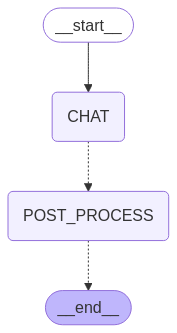

In [17]:
display(ipd.Image(state_graph.compile().get_graph().draw_mermaid_png()))

### Wrapper function to stream generation output to notebook

In [18]:
async def ask(
    user_input: str,
    session: str | None = None,
    user_latitude: float = 32.631012,
    user_longitude: float = -116.968043,
):
    thread_id = session or uuid.uuid4().hex

    agent_config = AgentConfig(
        project=PROJECT_ID,
        region=REGION,
        chat_model_name=CHAT_MODEL_NAME,
        cymbal_dataset_location=CYMBAL_DATASET_LOCATION,
        cymbal_products_table_uri=CYMBAL_PRODUCTS_TABLE_URI,
        cymbal_stores_table_uri=CYMBAL_STORES_TABLE_URI,
        cymbal_inventory_table_uri=CYMBAL_INVENTORY_TABLE_URI,
        cymbal_embedding_model_uri=CYMBAL_EMBEDDING_MODEL_URI,
    )

    current_source = last_source = None
    all_text = ""
    async for chunk in compiled_graph.astream(
        input={
            "current_turn": {
                "user_input": user_input,
                "user_latitude": user_latitude,
                "user_longitude": user_longitude,
            }
        },
        config={"configurable": {"thread_id": thread_id, "agent_config": agent_config}},
        stream_mode="custom",
    ):
        assert isinstance(chunk, dict), "Expected dictionary chunk"

        text = ""

        if "text" in chunk:
            text = chunk["text"]
            current_source = "text"

        elif "function_call" in chunk:
            function_call_dict = chunk["function_call"]

            fn_name = function_call_dict.get("name") or "unknown"
            fn_args = function_call_dict.get("args") or {}

            fn_args_string = ", ".join(f"{k}={v}" for k, v in fn_args.items())
            fn_string = f"**{fn_name}**({fn_args_string})"

            text = f"Calling function... {fn_string}"
            current_source = "function_call"

        elif "function_response" in chunk:
            function_response_dict = chunk["function_response"]

            fn_name = function_response_dict.get("name") or "unknown"

            if function_response_dict.get("response") is None:
                text = f"Received empty function response (name={fn_name})."

            elif "result" in function_response_dict.get("response"):
                fn_result = function_response_dict["response"]["result"]
                text = "\n\n".join(
                    [
                        f"Function result for **{fn_name}**...",
                        "```json",
                        json.dumps(fn_result, indent=2),
                        "```",
                    ]
                )

            elif "error" in function_response_dict.get("response"):
                fn_result = function_response_dict["response"]["error"]
                text = f"Function error (name={fn_name})... {fn_result}"

            current_source = "function_response"

        elif "error" in chunk:
            text = chunk["error"]
            current_source = "error"

        else:
            print("unhandled chunk case:", chunk)

        if last_source is not None and last_source != current_source:
            text = "\n\n---\n\n" + text

        last_source = current_source

        all_text += text
        display(ipd.Markdown(all_text), clear=True)

## Test Conversation

In [19]:
session = uuid.uuid4().hex

In [20]:
await ask("Do you sell curtains under $50?", session=session)

Calling function... **find_products**(max_price=50, product_search_query=curtains)

---

Function result for **find_products**...

```json

{
  "products": [
    {
      "id": "cedc7ad510f543dd80328822700192f4",
      "name": "Impressions Kyrie Lattice Textured Sheer Curtain Set of 2 with Grommet Header",
      "url": "https://www.cymbalstore.com/ip/Impressions-Kyrie-Lattice-Textured-Sheer-Curtain-Set-of-2-with-Grommet-Header/903030067",
      "description": " Included: Two (2) Curtain Panels Materials: 100% polyester Pattern: Geometric, Lattice, Diamond Style: Modern Quality: The top hem measures 3.74?, the bottom hem measures 1.96? and the side hem measures 0.98? each Colors: White, Grey Grommets: Each panel has eight polished stainless and rust-free grommets. Sturdy and large enough for most rods in the market making it easy to move the curtain. Interior diameter measures about 1.6 inches and exterior diameter at about 2.4 inches Care: Panels are easily machine washable. They are fade, wrinkle and shrink resistant. Wash Cold, Gentle cycle, tumble dry low, do not bleach, warm iron when needed Add a charming flourish to your windows with the Kyrie Lattice Sheer Curtain Set. This panel duo updates your favorite space quickly and economically. These lovely curtains boast quality polyester construction and display a simple, textured lattice pattern you?re sure to enjoy. With 4 assorted sizes and 2 colors available, this set will add a graceful accent to your favorite space while allowing natural light to filter through and warm your interior.|Included: Two (2) Curtain Panels|Materials: 100% polyester|Pattern: Geometric, Lattice, Diamond|Style: Modern|Quality: The top hem measures 3.74?, the bottom hem measures 1.96? and the side hem measures 0.98? each|Colors: White, Grey|Grommets: Each panel has eight polished stainless and rust-free grommets. Sturdy and large enough for most rods in the market making it easy to move the curtain. Interior diameter measures about 1.6 inches and exterior diameter at about 2.4 inches|Care: Panels are easily machine washable. They are fade, wrinkle and shrink resistant. Wash Cold, Gentle cycle, tumble dry low, do not bleach, warm iron when needed",
      "brand": "Impressions",
      "category": "Home | Decor | Curtains & Window Treatments | Curtains | Sheer Curtains",
      "available": true,
      "list_price": 38.85,
      "sale_price": 38.85,
      "currency": "usd"
    },
    {
      "id": "c784b3b1ba1c6587d3acb1724c582e22",
      "name": "Hlc.Me Carol Floral Embroidered Thermal Room Darkening Blackout Window Curtain Grommet Panels Sliding Glass Patio Doors - Single Panel",
      "url": "https://www.cymbalstore.com/ip/Hlc-Me-Carol-Floral-Embroidered-Thermal-Room-Darkening-Blackout-Window-Curtain-Grommet-Panels-Sliding-Glass-Patio-Doors-Single-Panel/596955927",
      "description": " Darkens Room for Sounder Sleep: These blackout curtain panels use a thermal insulated fabric that eliminates 99% of light, creating a dark, relaxing sanctuary for sleep as well as privacy. Energy Efficiency: Your blackout panel curtains help you stay toasty warm during the cold winter nights and cool on long, hot summer days. You could even save on your home energy bills. Thick, Premium Fabric: Made of sturdy polyester material, these long, classy drapes feature a high-quality design that wont fade in the sun or after a few washes. Durable Metal Grommets: Each curtain panel features eight (8) grommets that are much sturdier and longer lasting than flimsy plastic ones. They also add a sophisticated finish. Adds Style to Any Room: With its luxurious fabric and trendy decorative design, your double curtain panel set looks fab in a master or guest bedroom, bathroom, living room, or kids room. Looking to add a dash of elegance to your living spaces while improving comfort? With these curtains from HLC.ME, the beauty is much more than skin deep. Beyond the stunning design and array of fashionable colors, insulated curtain panels block out disruptive light and help maintain a comfortable temperature in your home. 99% Light blocking Thermal insulated for heat / cool air retention Premium blackout fabric Beautiful, no-fade design Sturdy metal grommets (not plastic) Wide array of colors and sizes available For indoor use only Studies show that light from outside can be detrimental to our sleep and the thin, sheer curtains that are so popular today arent much help. These 99% Blackout Curtains from HLC.ME allow you to infuse your home with supreme style while creating a sleep sanctuary in your master bedroom, childs bedroom, or nursery. The secret of our curtain panels is our innovative triple-weave material, which effectively blocks light from shining through (99% of light, in fact). Our blackout curtains are sturdy without being too heavy and bulky and provide a high-end decorative touch. Feel like warm or cool air just goes right out the window (along with your hard-earned money)? HLC.ME Blackout Curtains are the ideal complement to your efforts to conserve energy at home. Each panel features a thin thermal lining to prevent heat and cold air from entering your home, keeping your living spaces at a comfortable temperature all year long. Machine washable: Dust build-up or stains on your curtains? No need to fret; Machine Washable! |Darkens Room for Sounder Sleep: These blackout curtain panels use a thermal insulated fabric that eliminates 99% of light, creating a dark, relaxing sanctuary for sleep as well as privacy.|Energy Efficiency: Your blackout panel curtains help you stay toasty warm during the cold winter nights and cool on long, hot summer days. You could even save on your home energy bills.|Thick, Premium Fabric: Made of sturdy polyester material, these long, classy drapes feature a high-quality design that wont fade in the sun or after a few washes.|Durable Metal Grommets: Each curtain panel features eight (8) grommets that are much sturdier and longer lasting than flimsy plastic ones. They also add a sophisticated finish.|Adds Style to Any Room: With its luxurious fabric and trendy decorative design, your double curtain panel set looks fab in a master or guest bedroom, bathroom, living room, or kids room.",
      "brand": "HLC.me",
      "category": "Home | Decor | Curtains & Window Treatments | Curtains | Blackout Curtains",
      "available": true,
      "list_price": 42.0,
      "sale_price": 42.0,
      "currency": "usd"
    },
    {
      "id": "017b95178c6ab7072885794d4ebfacdb",
      "name": "Exclusive Home Curtains 2 Pack Sateen Woven Blackout Pinch Pleat Curtain Panels",
      "url": "https://www.cymbalstore.com/ip/Exclusive-Home-Curtains-2-Pack-Sateen-Woven-Blackout-Pinch-Pleat-Curtain-Panels/398670872",
      "description": "  Exclusive Home Curtains 2-Pack Sateen Woven Blackout Pinch Pleat Panels: Set includes: 2 curtain panels, each measuring 84,L x 52,W Blocks out light Noise reduction Insulates the room from the outside heat or cold Available in 84,, 96, and 108, lengths Available in Charcoal, Chili, Espresso, Mecca Orange, Peacoat Blue, silver, teal and Vanilla These Exclusive Home Curtains Sateen Woven Blackout Pinch Pleat Panels, 2-Pack are ideal to use in a living room, bedroom, dining room and more. They block out light, which will help darken the room as needed. These exclusive home curtain panels also reduce noise to help keep serenity in the home. They also insulate from outside heat or cold, so they are energy efficient. They come in a wide variety of beautiful colors and lengths to fit your current needs.|Set includes: 2 curtain panels, each measuring 84,L x 52,W|Blocks out light|Noise reduction|Insulates the room from the outside heat or cold|Available in 84,, 96, and 108, lengths|Available in Charcoal, Chili, Espresso, Mecca Orange, Peacoat Blue, silver, teal and Vanilla",
      "brand": "Exclusive Home",
      "category": "Home | Decor | Curtains & Window Treatments | Curtains | Blackout Curtains",
      "available": true,
      "list_price": 34.99,
      "sale_price": 23.13,
      "currency": "usd"
    }
  ],
  "query": "SELECT\n    base.uniq_id AS id,\n    base.product_name AS name,\n    base.product_url AS url,\n    base.product_description AS description,\n    base.brand,\n    base.category,\n    base.available,\n    base.list_price,\n    IF(base.sale_price <= base.list_price, base.sale_price, NULL) AS sale_price\nFROM\n    VECTOR_SEARCH(\n        TABLE `genai-concierge-demo.cymbal_retail.cymbal_product`,\n        'text_embedding',\n        (SELECT\n            text_embedding,\n            content AS query\n        FROM\n            ML.GENERATE_TEXT_EMBEDDING(\n                MODEL `genai-concierge-demo.cymbal_retail.text_embedding`,\n                (\n                    SELECT @semantic_search_query AS content\n                )\n            )\n        ),\n        top_k => @top_k\n    ) as vector_search\n    \nWHERE (IFNULL(base.sale_price, base.list_price) <= @max_price)\nLIMIT @max_results",
  "error": null
}

```

---

Yes, I found a few curtains under $50:

*   **Impressions Kyrie Lattice Textured Sheer Curtain Set of 2 with Grommet Header** for $38.85
*   **Hlc.Me Carol Floral Embroidered Thermal Room Darkening Blackout Window Curtain Grommet Panels Sliding Glass Patio Doors - Single Panel** for $42
*   **Exclusive Home Curtains 2 Pack Sateen Woven Blackout Pinch Pleat Curtain Panels** for $23.13

In [21]:
await ask(
    "What stores carry the last one?",
    session=session,
)

Calling function... **find_stores**(product_ids=['017b95178c6ab7072885794d4ebfacdb'])

---

Function result for **find_stores**...

```json

{
  "stores": [
    {
      "id": "3180",
      "name": "Chula Vista Supercenter",
      "url": "https://www.cymbalstore.com/store/3516/chula-vista-ca/details",
      "street_address": "1360 Eastlake Pkwy",
      "city": "Chula Vista",
      "state": "CA",
      "zip_code": 91915,
      "country": "US",
      "phone_number": "619-421-3140",
      "latitude": 32.631012,
      "longitude": -116.968043
    },
    {
      "id": "1634",
      "name": "Poway Supercenter",
      "url": "https://www.cymbalstore.com/store/1700/poway-ca/details",
      "street_address": "13425 Community Road",
      "city": "Poway",
      "state": "CA",
      "zip_code": 92064,
      "country": "US",
      "phone_number": "858-486-1882",
      "latitude": 32.9589415,
      "longitude": -117.0376617
    },
    {
      "id": "2094",
      "name": "San Diego Store",
      "url": "https://www.cymbalstore.com/store/2177/san-diego-ca/details",
      "street_address": "3382 Murphy Canyon Road",
      "city": "San Diego",
      "state": "CA",
      "zip_code": 92123,
      "country": "US",
      "phone_number": "858-571-6094",
      "latitude": 32.805348,
      "longitude": -117.116408
    }
  ],
  "query": "SELECT\n        CAST(store.store_id AS STRING) AS id,\n        store.name,\n        store.url,\n        store.street_address,\n        store.city,\n        store.state,\n        store.zip_code,\n        store.country,\n        store.phone_number_1 as phone_number,\n        store.latitude,\n        store.longitude,\n    FROM\n        (SELECT\n        store.*\n    FROM\n        genai-concierge-demo.cymbal_retail.cymbal_store AS store,\n        (SELECT DISTINCT\n            store_id\n        FROM\n            genai-concierge-demo.cymbal_retail.cymbal_inventory\n        WHERE\n            uniq_id IN UNNEST(@product_ids)\n        ) AS inventory\n    WHERE\n        store.store_id = inventory.store_id) AS store",
  "error": null
}

```

---

The Exclusive Home Curtains 2 Pack Sateen Woven Blackout Pinch Pleat Curtain Panels are available at:

*   Chula Vista Supercenter
*   Poway Supercenter
*   San Diego Store

In [22]:
await ask(
    "How many do they have left in Chula Vista? That's the closest to me",
    session=session,
)

Calling function... **find_inventory**(product_id=017b95178c6ab7072885794d4ebfacdb, store_id=3180)

---

Function result for **find_inventory**...

```json

{
  "inventory": {
    "store_id": "3180",
    "product_id": "017b95178c6ab7072885794d4ebfacdb",
    "value": 9
  },
  "query": "SELECT\n        CAST(store_id AS STRING) AS store_id,\n        uniq_id AS product_id,\n        inventory AS value,\n    FROM\n        genai-concierge-demo.cymbal_retail.cymbal_inventory\n    WHERE\n        store_id = @store_id\n        AND uniq_id = @product_id",
  "error": null
}

```

---

There are 9 of the Exclusive Home Curtains 2 Pack Sateen Woven Blackout Pinch Pleat Curtain Panels left in the Chula Vista Supercenter.